In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_customers=pd.read_csv('customers.csv')
df_loans=pd.read_csv('loans.csv')
df_bureau=pd.read_csv('bureau_data.csv')

In [3]:
df_customers.shape,df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df=pd.merge(df_customers,df_loans,on='cust_id')

In [5]:
df.shape

(50000, 26)

In [6]:
df=pd.merge(df,df_bureau,on='cust_id')

In [7]:
df.shape

(50000, 33)

In [8]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default']=df['default'].astype('int32')

In [11]:
df['default'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: default
Non-Null Count  Dtype
--------------  -----
50000 non-null  int32
dtypes: int32(1)
memory usage: 195.4 KB


In [12]:
X=df.drop('default',axis=1)
y=df['default']

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=77)

In [14]:
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)

In [15]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

In [16]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 49
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

The residence_type column has some na values.We are replacing those na values with the mode of residence_type column

In [17]:
residence_type_mode=df_train['residence_type'].mode()[0]
residence_type_mode

'Owned'

In [18]:
df_train['residence_type'].fillna(residence_type_mode,inplace=True)

df_train['residence_type'].isna().sum()

C:\Users\pruth\AppData\Local\Temp\ipykernel_23144\3167407236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['residence_type'].fillna(residence_type_mode,inplace=True)


np.int64(0)

In [19]:
df_test['residence_type'].fillna(residence_type_mode,inplace=True)

C:\Users\pruth\AppData\Local\Temp\ipykernel_23144\4087620147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['residence_type'].fillna(residence_type_mode,inplace=True)


In [20]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

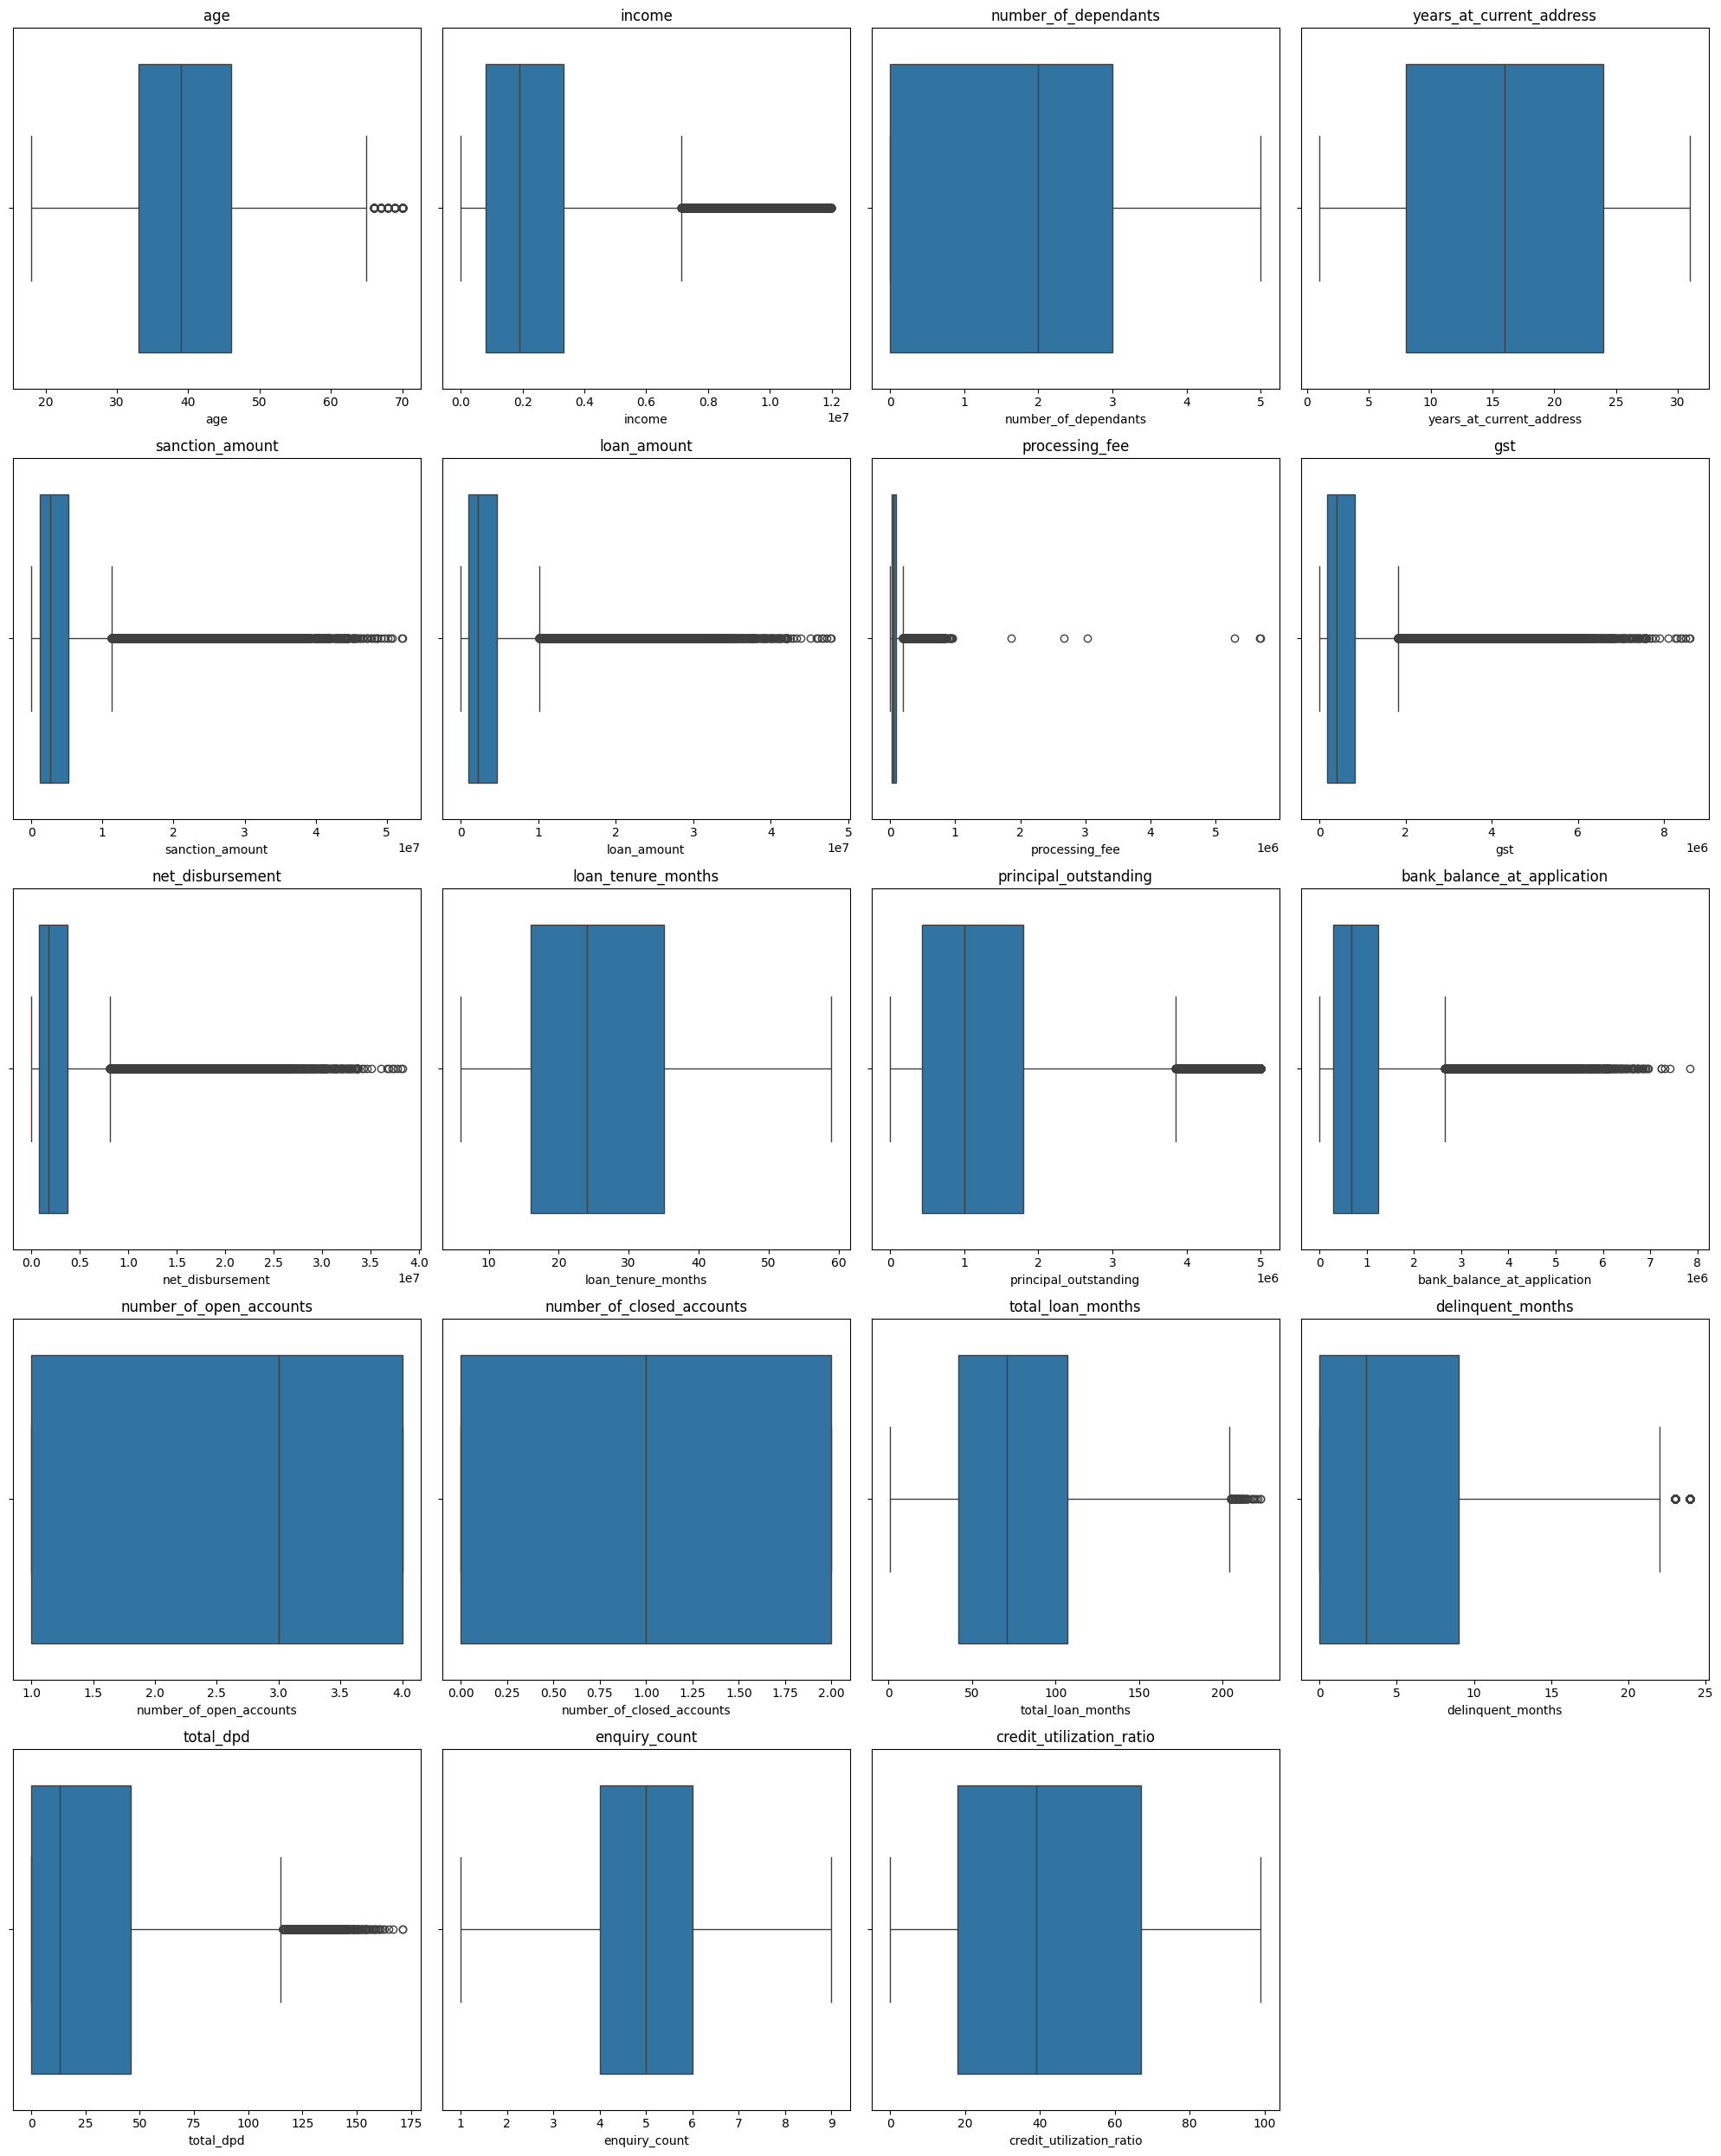

In [21]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

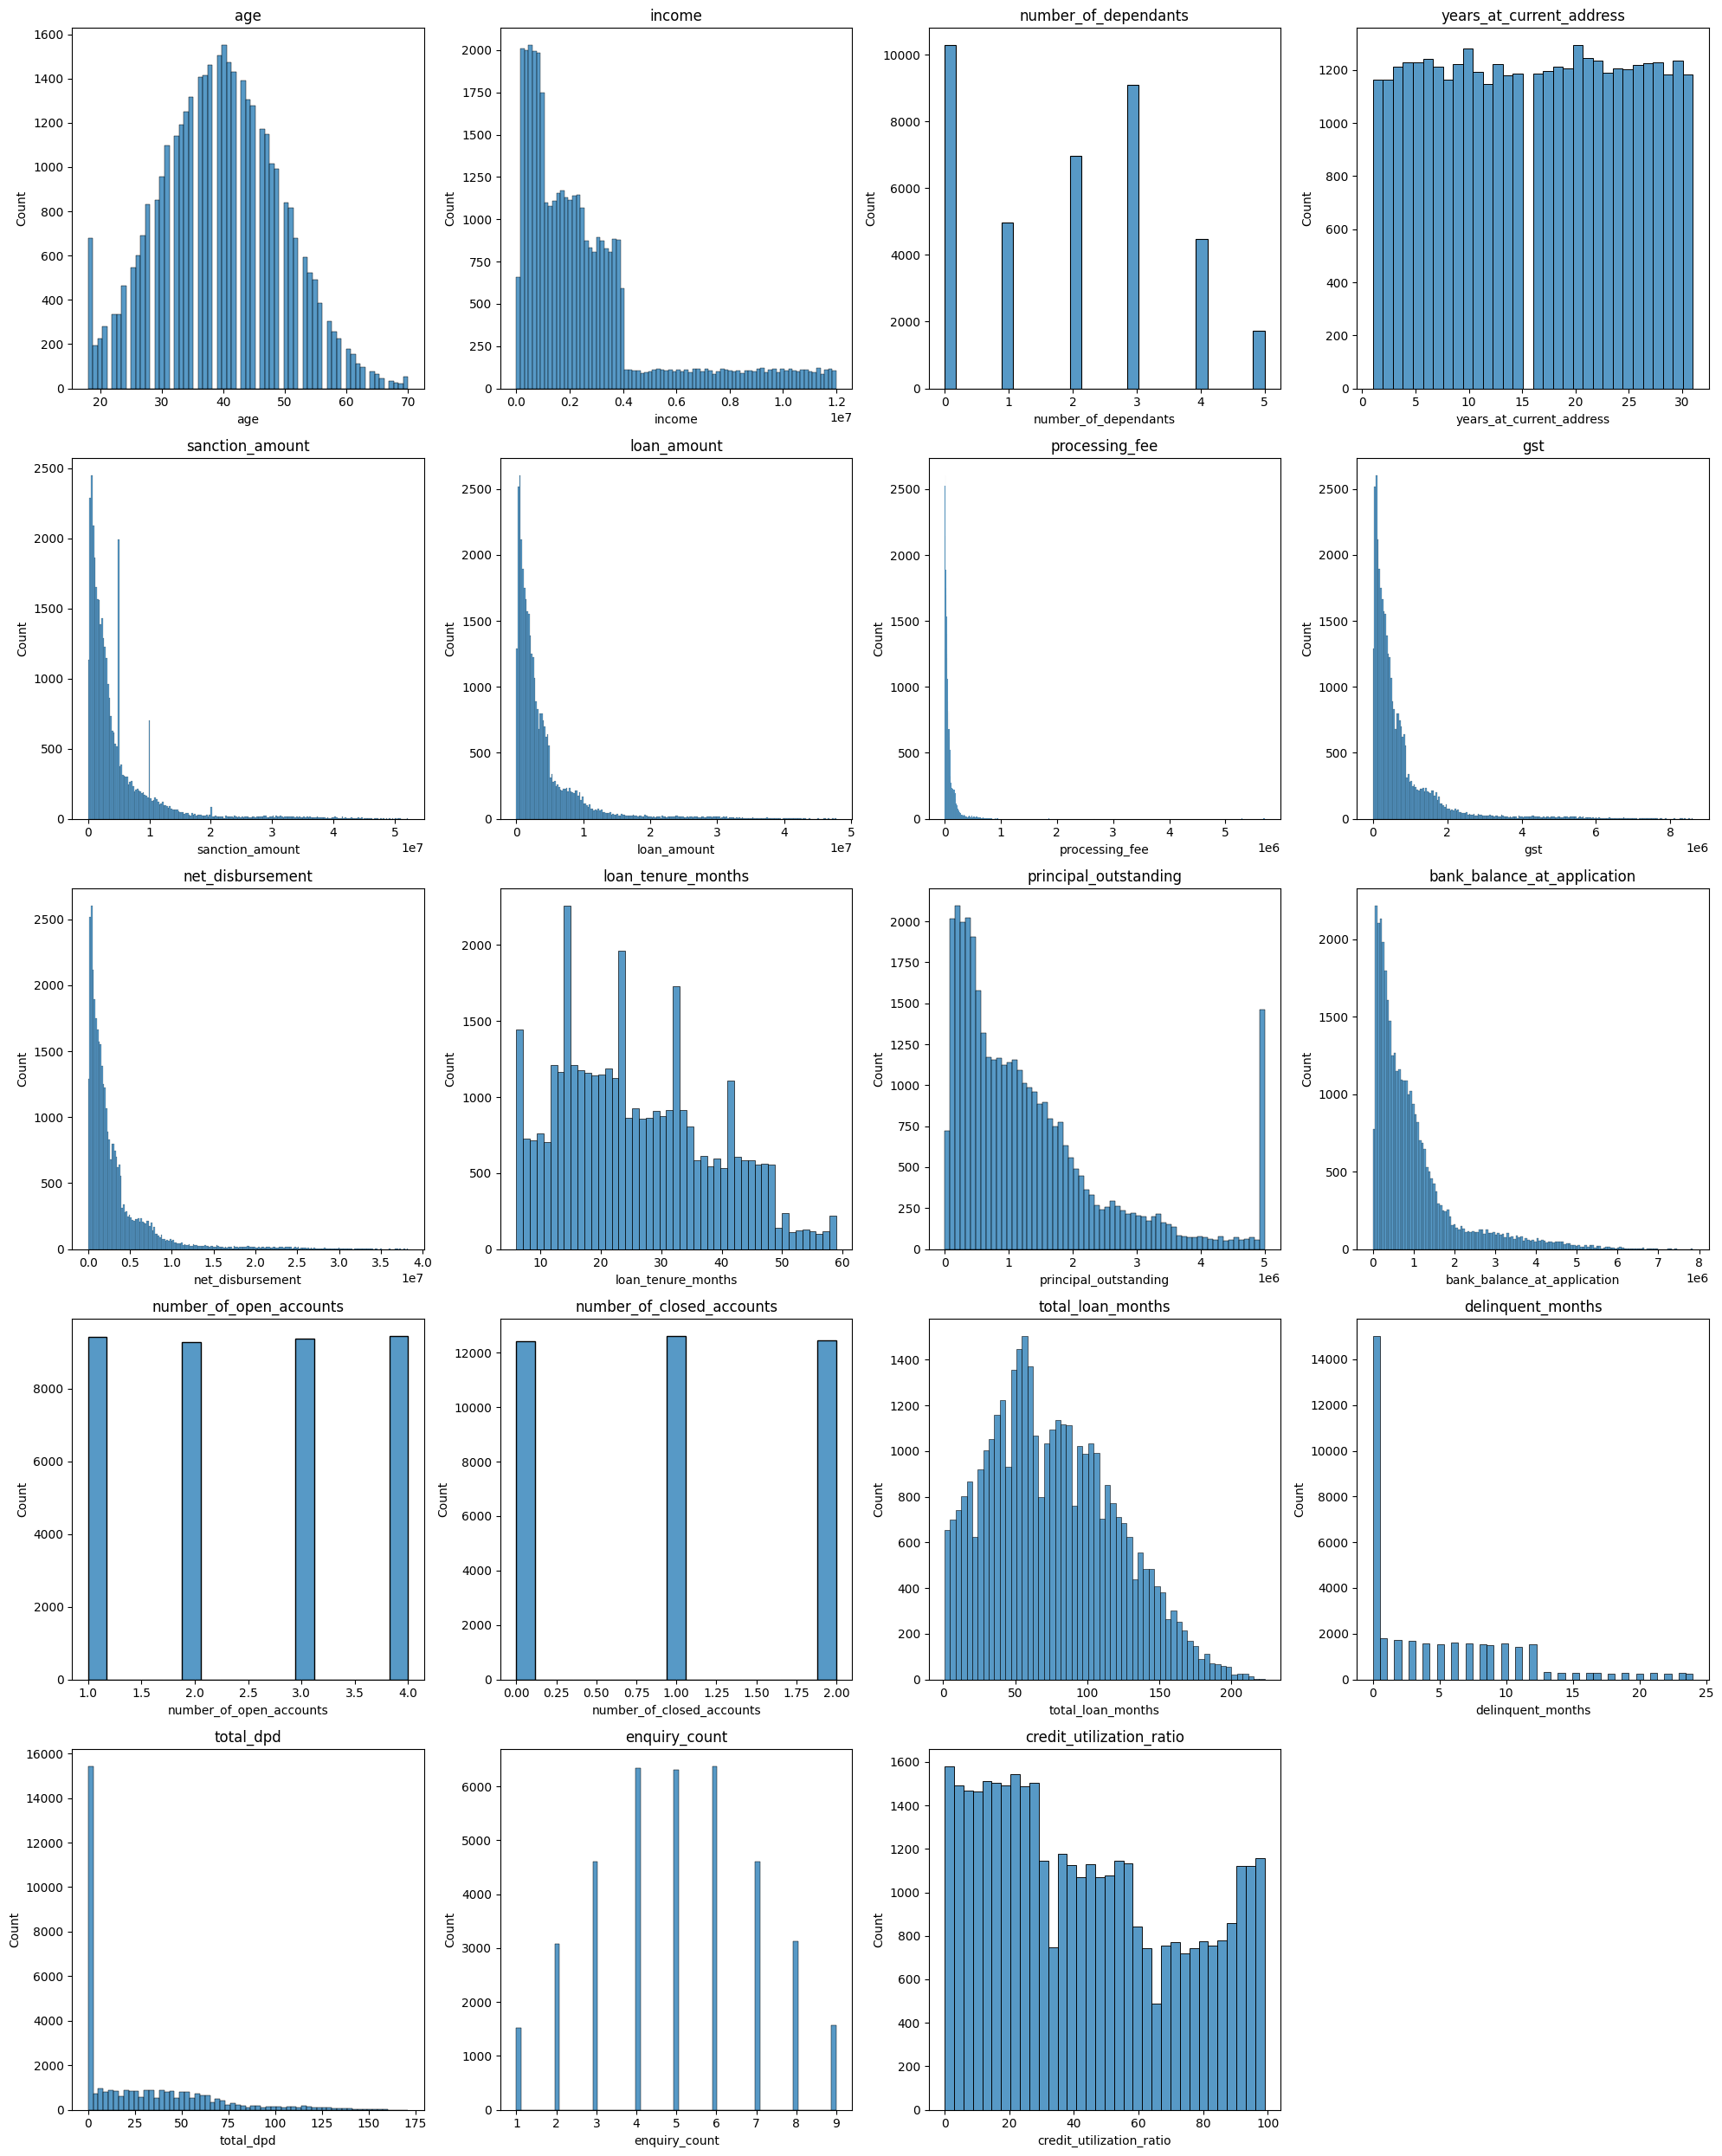

In [22]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [23]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.086038e+04
std      1.207635e+05
min      0.000000e+00
25%      1.928000e+04
50%      4.470000e+04
75%      9.236500e+04
max      5.698030e+06
Name: processing_fee, dtype: float64

In [24]:
df_train[df_train['processing_fee']/df_train['loan_amount']>0.03]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12294,C12295,49,M,Married,Salaried,3504000,2,Rented,24,Ahmedabad,...,2020-10-15,2020-10-23,1,2,58,0,0,3,86,0
9898,C09899,56,M,Married,Self-Employed,8948000,5,Owned,16,Ahmedabad,...,2020-07-19,2020-08-11,2,1,51,1,5,3,92,0
33705,C33706,54,M,Married,Self-Employed,10763000,2,Mortgage,5,Ahmedabad,...,2022-12-05,2022-12-30,3,1,140,0,0,5,47,0
29305,C29306,52,M,Married,Self-Employed,3839000,2,Owned,11,Delhi,...,2022-06-28,2022-07-21,2,2,42,11,65,3,2,0
47089,C47090,37,M,Married,Self-Employed,1892000,2,Rented,13,Jaipur,...,2024-04-07,2024-04-15,3,0,112,5,33,3,32,0
23981,C23982,33,F,Single,Self-Employed,1790000,0,Rented,7,Kolkata,...,2021-12-15,2022-01-14,4,2,154,9,31,6,26,0


In [25]:
df_train_1=df_train[df_train['processing_fee']/df_train['loan_amount']<=0.03].copy()

In [26]:
df_train_1[df_train_1['processing_fee']/df_train_1['loan_amount']>0.03]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [27]:
df_test=df_test[df_test['processing_fee']/df_test['loan_amount']<=0.03]
df_test.shape

(12497, 33)

In [28]:
df_train_1[df_train_1['gst']/df_train_1['loan_amount']>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [29]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [30]:
for col in columns_categorical:
    print(col,'-->', df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Rented' 'Mortgage']
city --> ['Pune' 'Delhi' 'Kolkata' 'Hyderabad' 'Chennai' 'Mumbai' 'Jaipur'
 'Lucknow' 'Ahmedabad' 'Bangalore']
state --> ['Maharashtra' 'Delhi' 'West Bengal' 'Telangana' 'Tamil Nadu' 'Rajasthan'
 'Uttar Pradesh' 'Gujarat' 'Karnataka']
zipcode --> [411001 110001 700001 500001 600001 400001 302001 226001 380001 560001]
loan_purpose --> ['Personal' 'Auto' 'Home' 'Education' 'Personaal']
loan_type --> ['Unsecured' 'Secured']
default --> [0 1]


Here we can see that the column loan_purpose has an issue.

In [31]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')
df_train_1['loan_purpose'].unique()

array(['Personal', 'Auto', 'Home', 'Education'], dtype=object)

In [32]:
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')

### Exploratory Data Analysis

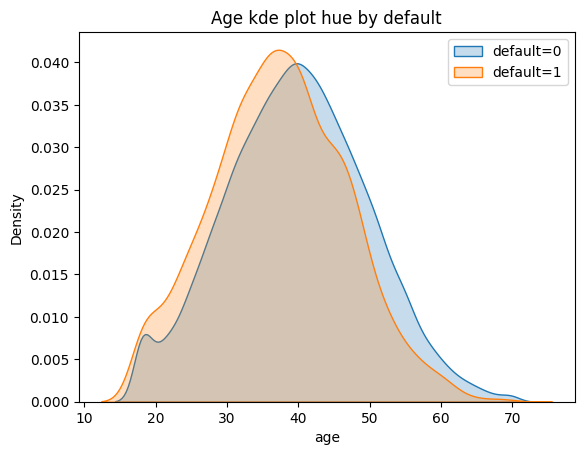

In [33]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'],fill=True,label='default=0')
sns.kdeplot(df_train_1[df_train_1.default==1]['age'],fill=True,label='default=1')
plt.title('Age kde plot hue by default')
plt.legend()
plt.show()


Insigths
1. Orange graph is little bit shifted to left side of blue graph which indicates that people with young age are more likely to default

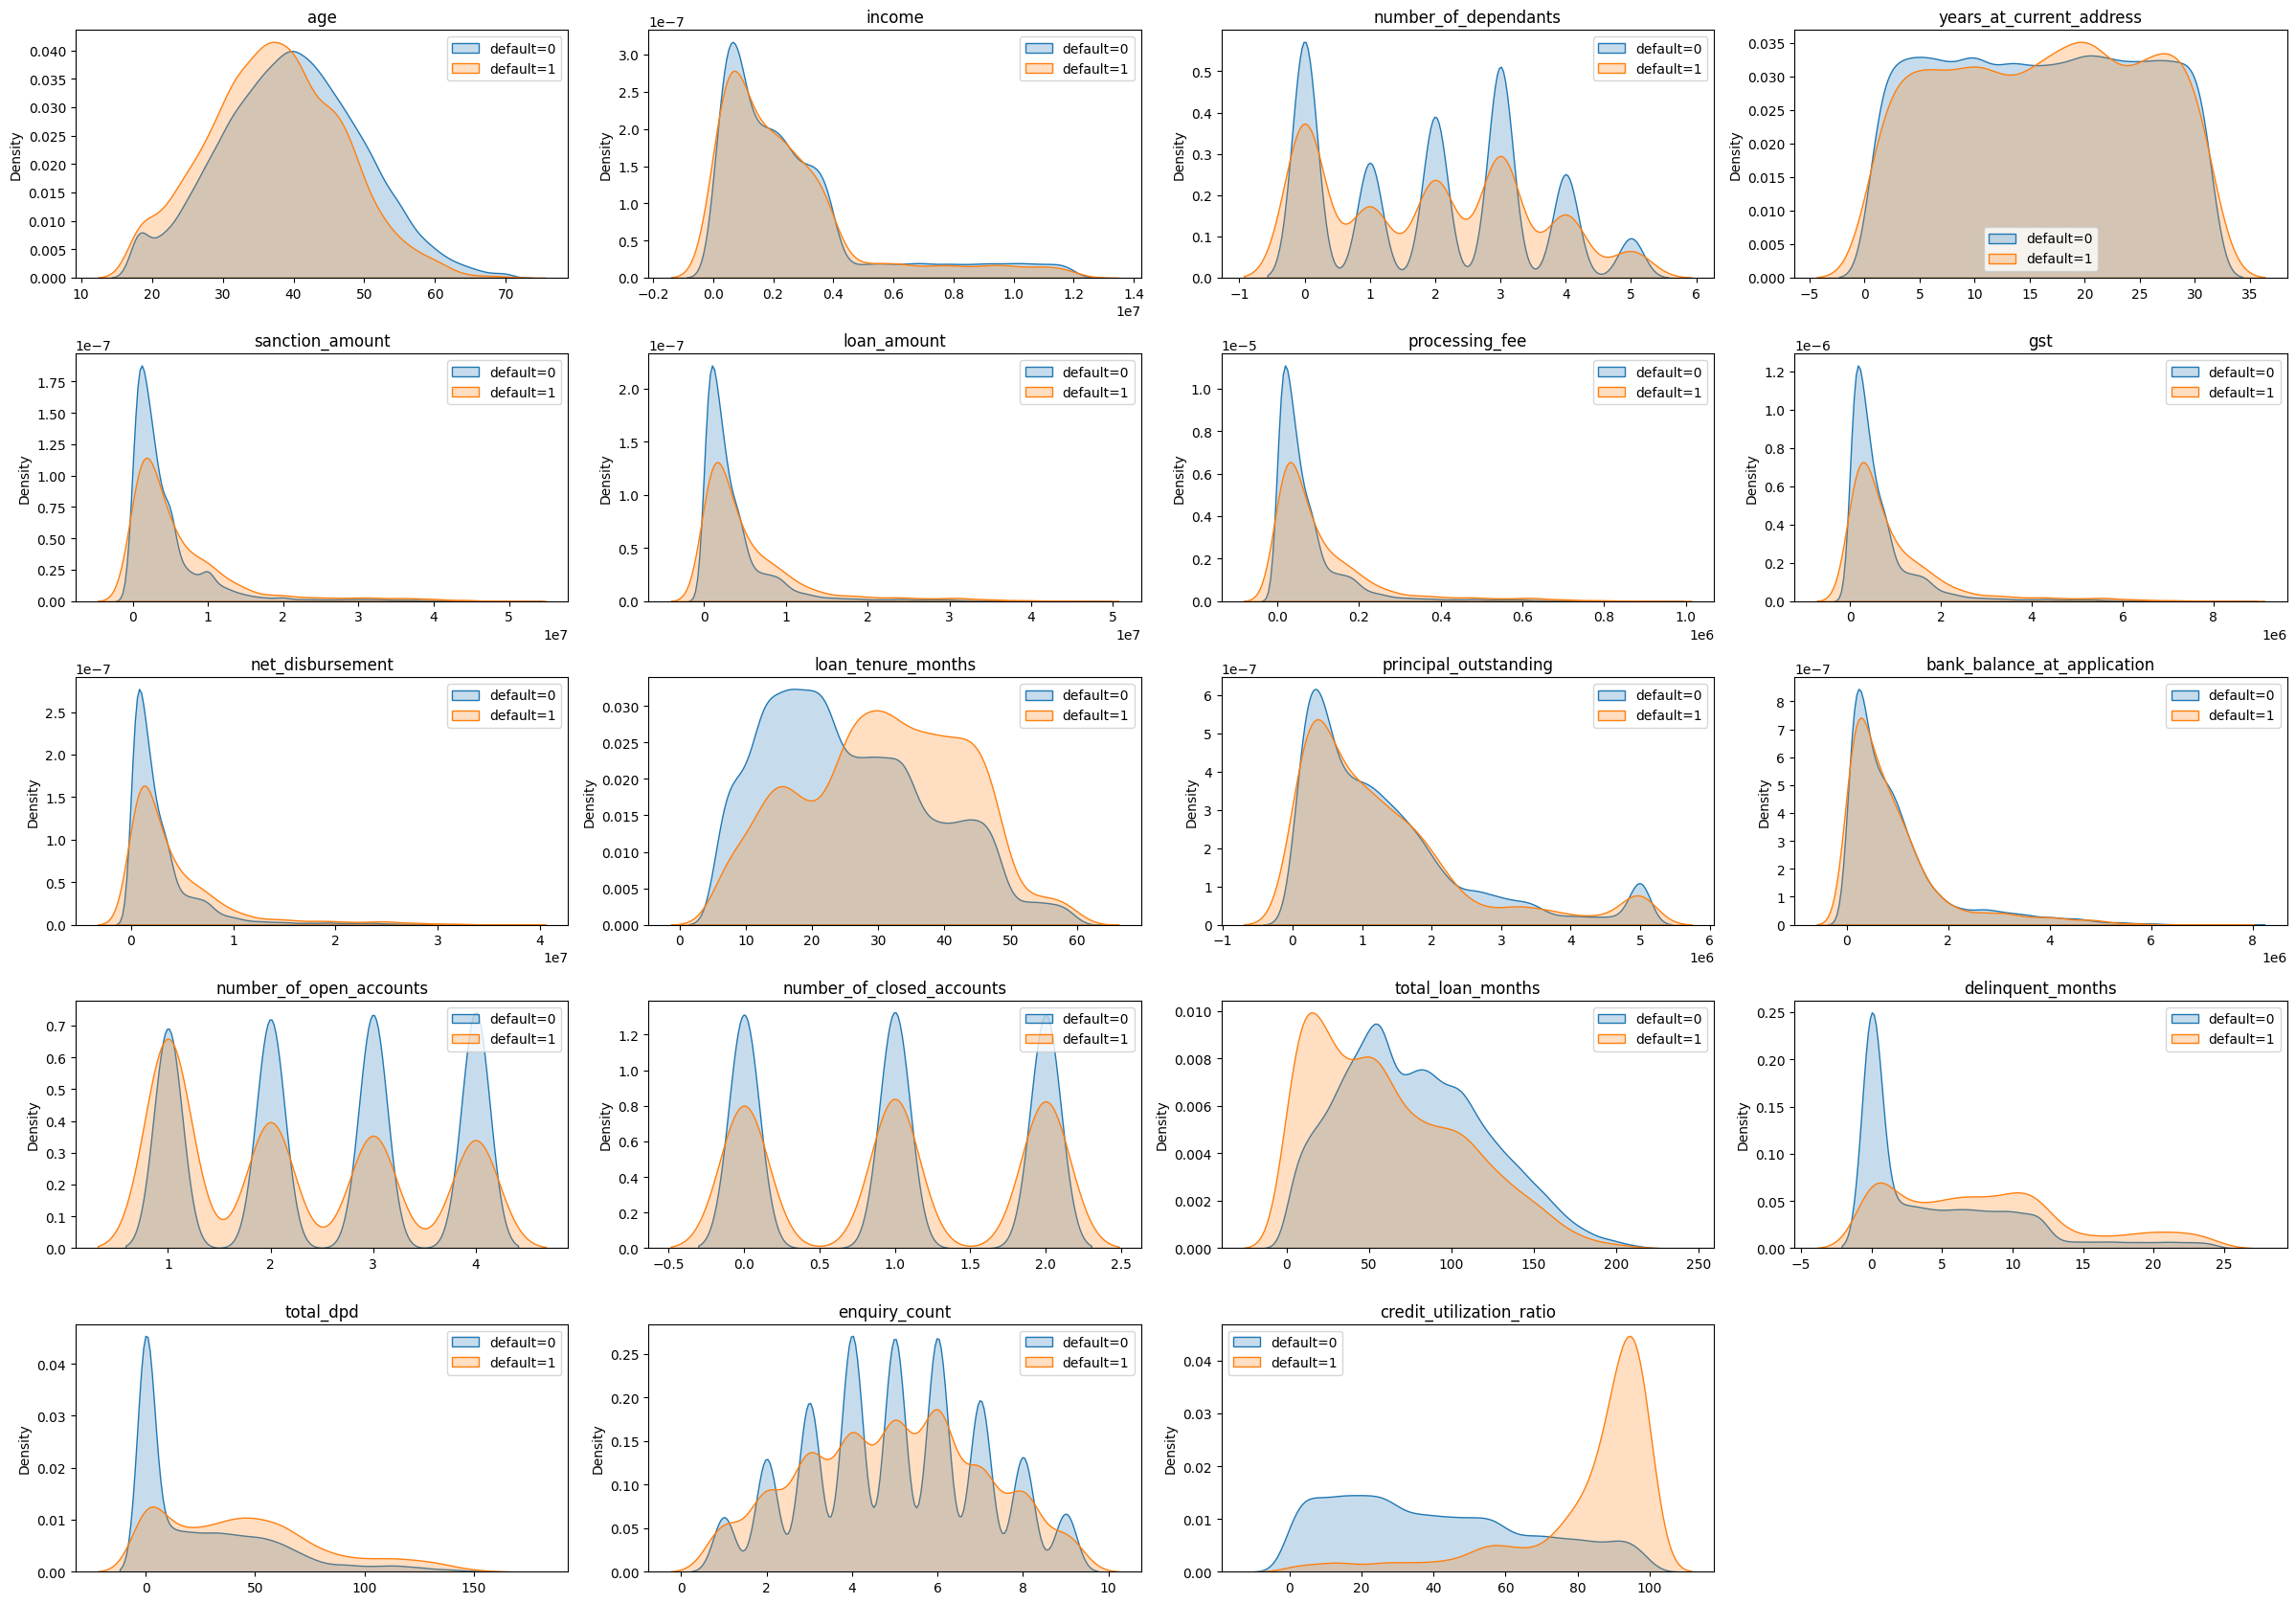

In [34]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)
    plt.legend()
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

### Feature Engineering

In [35]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [36]:
df_train_1[['income','loan_amount']].head()

,income,loan_amount
23817,4642000,2791000
2919,328000,244000
7126,2701000,1801000
28154,8274000,7616000
30176,3323000,3139000


In [37]:
df_train_1['loan_to_income']=(df_train_1['loan_amount']/df_train_1['income']).round(2)

df_train_1['loan_to_income'].head()

23817    0.60
2919     0.74
7126     0.67
28154    0.92
30176    0.94
Name: loan_to_income, dtype: float64

In [38]:
df_test['loan_to_income']=(df_test['loan_amount']/df_test['income']).round(2)

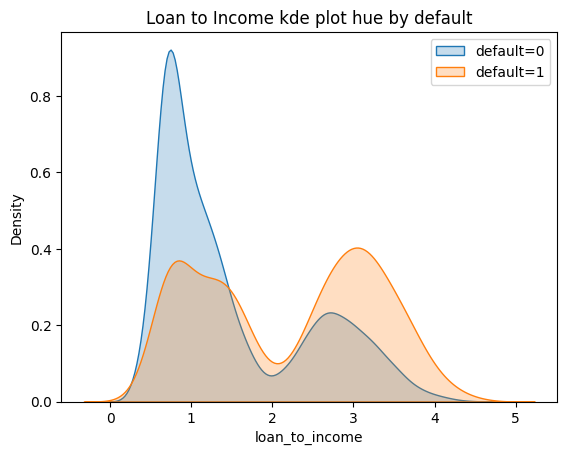

In [39]:
sns.kdeplot(df_train_1[df_train_1['default']==0]['loan_to_income'],fill=True,label='default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['loan_to_income'],fill=True,label='default=1')
plt.title('Loan to Income kde plot hue by default')
plt.legend()
plt.show()

In [40]:
df_train_1[['delinquent_months','total_loan_months']]

,delinquent_months,total_loan_months
23817,10,138
2919,17,62
7126,10,50
28154,10,61
30176,6,14
...,...,...
7832,0,53
42277,0,91
18667,0,99
8799,12,51


In [41]:
df_train_1['delinquency_ratio']=(df_train_1['delinquent_months']*100/df_train_1['total_loan_months']).round(1)

df_train_1['delinquency_ratio']

23817     7.2
2919     27.4
7126     20.0
28154    16.4
30176    42.9
         ... 
7832      0.0
42277     0.0
18667     0.0
8799     23.5
47831    10.1
Name: delinquency_ratio, Length: 37488, dtype: float64

In [42]:
df_test['delinquency_ratio']=(df_test['delinquent_months']*100/df_test['total_loan_months']).round(1)

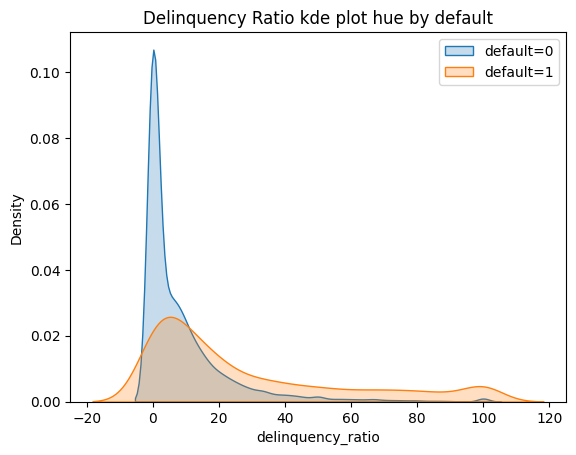

In [43]:
sns.kdeplot(df_train_1[df_train_1['default']==0]['delinquency_ratio'],fill=True,label='default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['delinquency_ratio'],fill=True,label='default=1')
plt.title('Delinquency Ratio kde plot hue by default')
plt.legend()
plt.show()

In [44]:
df_train_1['avg_dpd_per_delinquency']=np.where(df_train_1['delinquent_months']!=0,
                                               df_train_1['total_dpd']/df_train_1['delinquent_months'],0)

df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

In [45]:
df_test['avg_dpd_per_delinquency']=np.where(df_test['delinquent_months']!=0,
                                               df_test['total_dpd']/df_test['delinquent_months'],0)

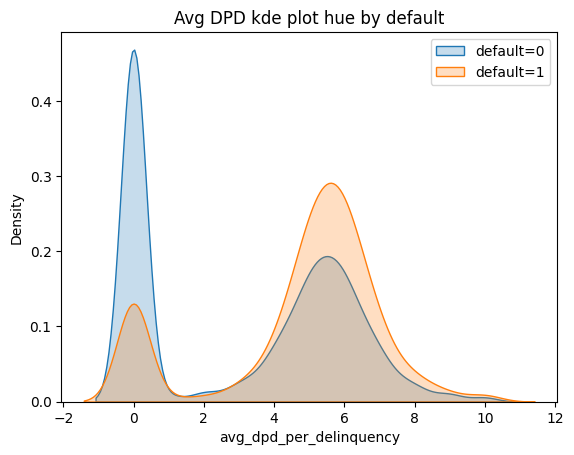

In [46]:
sns.kdeplot(df_train_1[df_train_1['default']==0]['avg_dpd_per_delinquency'],fill=True,label='default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['avg_dpd_per_delinquency'],fill=True,label='default=1')
plt.title('Avg DPD kde plot hue by default')
plt.legend()
plt.show()

In [47]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Feature Selection

In [48]:
df_train_2=df_train_1.drop(['cust_id','loan_id'],axis=1)

df_test=df_test.drop(['cust_id','loan_id'],axis=1)

### Remove columns that business contact person asked us to remove

In [49]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [50]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 23817 to 47831
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [51]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [52]:
X_train=df_train_3.drop('default',axis=1)

y_train=df_train_3['default']

### Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale=X_train.select_dtypes(['int64', 'float64']).columns

scaler=MinMaxScaler()

# Scale the numeric columns
X_train[cols_to_scale] = scaler.fit_transform(df_train_3[cols_to_scale])


In [54]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.413938,0.387521,0.501147,0.524016,0.089254,0.082941,0.082941,0.082941,0.375627,0.262766,0.124190,0.500756,0.500160,0.501294,0.439168,0.292513,0.104003,0.329279
std,0.190268,0.307152,0.297680,0.286347,0.120983,0.113163,0.113163,0.113163,0.234552,0.245483,0.134140,0.373516,0.407354,0.253848,0.296584,0.226417,0.173241,0.290282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020574,0.019155,0.019155,0.019155,0.188679,0.078293,0.034272,0.000000,0.000000,0.375000,0.181818,0.109557,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.510169,0.049555,0.045741,0.045741,0.045741,0.339623,0.194909,0.083134,0.666667,0.500000,0.500000,0.393939,0.200466,0.038000,0.433333
75%,0.538462,0.600000,0.766667,0.762712,0.098092,0.095627,0.095627,0.095627,0.547170,0.353975,0.155314,1.000000,1.000000,0.625000,0.676768,0.501166,0.130000,0.575000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
X_test=df_test.drop('default',axis=1)

y_test=df_test['default']

In [56]:
scaler=MinMaxScaler()

# Scale the numeric columns
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [57]:
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.00000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415908,0.389037,0.499010,0.523518,0.089537,0.089272,0.089272,0.089272,0.378104,0.260818,0.130570,0.497799,0.50164,0.500820,0.434494,0.292666,0.103963,0.331276
std,0.186706,0.306979,0.297160,0.286613,0.120394,0.120851,0.120851,0.120851,0.234709,0.242337,0.140735,0.371144,0.40619,0.253071,0.296355,0.228376,0.172328,0.290895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.021130,0.020856,0.020856,0.020856,0.188679,0.078731,0.035712,0.333333,0.00000,0.375000,0.181818,0.107981,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.491525,0.050587,0.050164,0.050164,0.050164,0.339623,0.194043,0.087278,0.333333,0.50000,0.500000,0.393939,0.201878,0.039000,0.437500
75%,0.538462,0.600000,0.766667,0.762712,0.099083,0.103710,0.103710,0.103710,0.547170,0.351870,0.166819,0.666667,1.00000,0.625000,0.676768,0.504695,0.132000,0.575000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Multicolinearity Check (VIF)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [59]:
calculate_vif(X_train[cols_to_scale])

C:\Users\pruth\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.668364
1,number_of_dependants,2.715252
2,years_at_current_address,3.428023
3,zipcode,3.797578
4,sanction_amount,101.830296
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.129179
9,principal_outstanding,16.195881


In [60]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [61]:
vif_df=calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.401124
1,number_of_dependants,2.712463
2,years_at_current_address,3.410657
3,zipcode,3.778820
4,loan_tenure_months,5.973348
5,bank_balance_at_application,1.800063
6,number_of_open_accounts,4.341799
7,number_of_closed_accounts,2.367521
8,enquiry_count,6.368167
9,credit_utilization_ratio,2.920882


In [62]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [63]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

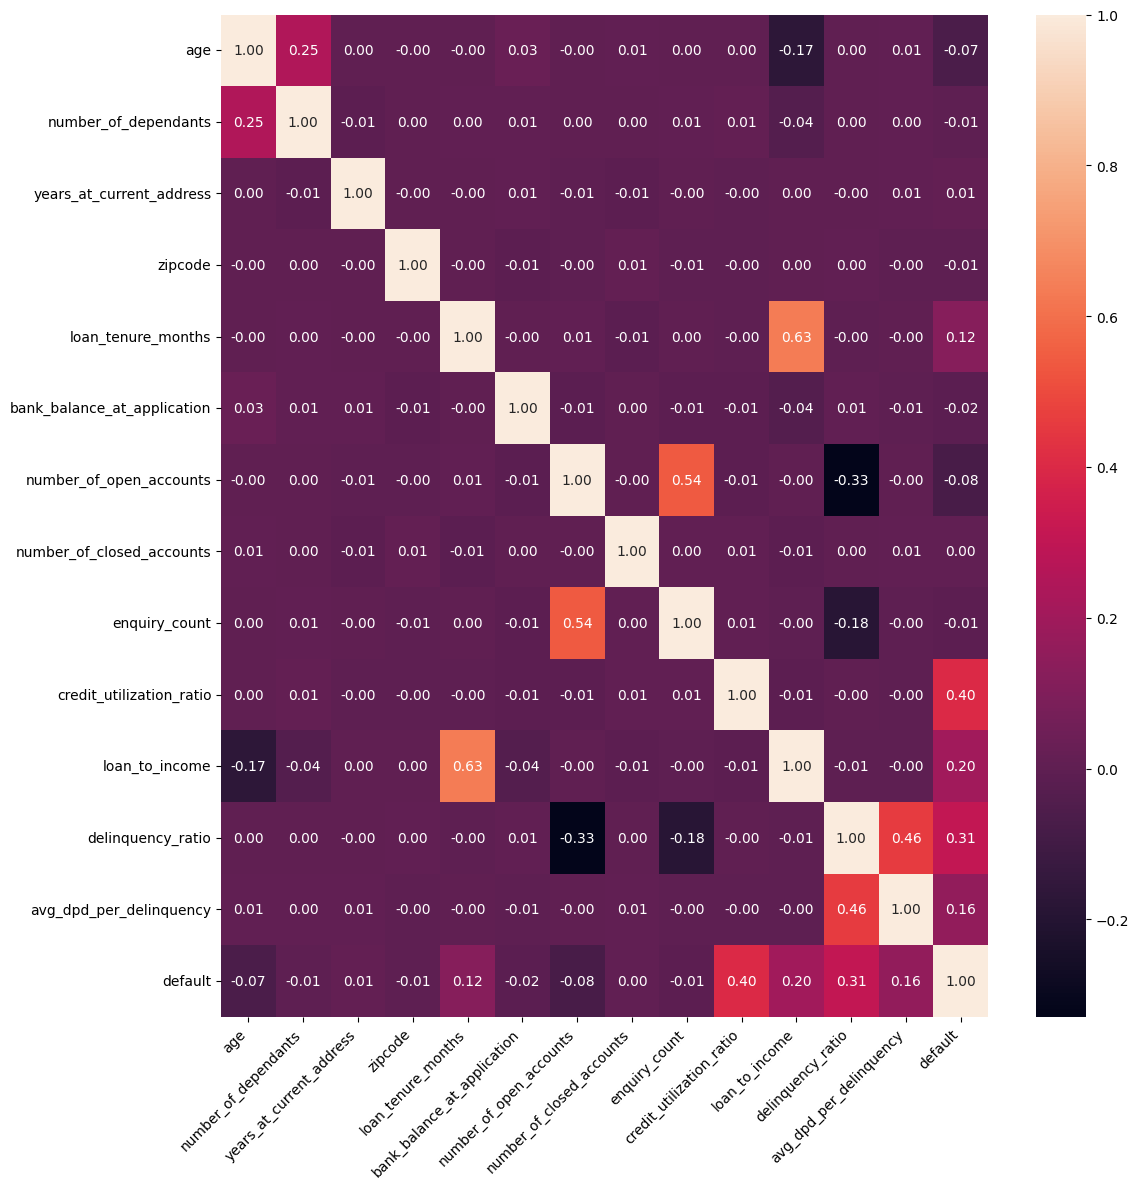

In [64]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [65]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

### WOE and IV

In [66]:
def calculate_woe_iv(df,feature,target):
    grouped=df.groupby(feature)[target].agg(['count','sum'])
    grouped=grouped.rename(columns={'count':'total','sum':'good'})
    grouped['bad']=grouped['total']-grouped['good']

    total_good=grouped['good'].sum()
    total_bad=grouped['bad'].sum()

    grouped['good_pct']=(grouped['good']/total_good).round(2)
    grouped['bad_pct']=(grouped['bad']/total_bad).round(2)

    grouped['woe']=np.log(grouped['good_pct']/grouped['bad_pct']).round(2)

    grouped['iv']=(grouped['woe']*(grouped['good_pct']-grouped['bad_pct'])).round(2)

    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv=grouped['iv'].sum()
    
    return grouped,total_iv

In [67]:
 grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1,y_train],axis=1),'loan_purpose','default')

In [68]:
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7464,328,7136,0.10,0.21,-0.74,0.08
Education,5663,552,5111,0.17,0.15,0.13,0.00
Home,11267,1735,9532,0.54,0.28,0.66,0.17
Personal,13094,579,12515,0.18,0.36,-0.69,0.12


In [69]:
total_iv

np.float64(0.37)

In [70]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 23817 to 47831
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  float64
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  float64
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  float64
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  float64
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  loan_tenure_months           37488 non-null  float64
 13  bank_balance_at_a

In [71]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

C:\Users\pruth\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'age': np.float64(0.060000000000000005),
 'gender': np.float64(0.0),
 'marital_status': np.float64(0.0),
 'employment_status': np.float64(0.0),
 'number_of_dependants': np.float64(0.0),
 'residence_type': np.float64(0.24),
 'years_at_current_address': np.float64(0.0),
 'city': np.float64(0.0),
 'state': np.float64(0.0),
 'zipcode': np.float64(0.0),
 'loan_purpose': np.float64(0.37),
 'loan_type': np.float64(0.16),
 'loan_tenure_months': np.float64(0.24),
 'bank_balance_at_application': np.float64(0.0),
 'number_of_open_accounts': np.float64(0.09),
 'number_of_closed_accounts': np.float64(0.0),
 'enquiry_count': np.float64(0.0),
 'credit_utilization_ratio': np.float64(2.3899999999999997),
 'loan_to_income': np.float64(0.44),
 'delinquency_ratio': np.float64(0.33),
 'avg_dpd_per_delinquency': np.float64(0.39)}

In [72]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.390
18,loan_to_income,0.440
20,avg_dpd_per_delinquency,0.390
10,loan_purpose,0.370
19,delinquency_ratio,0.330
12,loan_tenure_months,0.240
5,residence_type,0.240
11,loan_type,0.160
14,number_of_open_accounts,0.090
0,age,0.060


In [73]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [74]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [75]:
X_train_reduced.columns

Index(['age', 'residence_type', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [76]:
X_test_reduced.columns

Index(['age', 'residence_type', 'loan_purpose', 'loan_type',
       'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [77]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
23817,0.731,0.151,1.000,0.727,0.070,0.072,0.590,True,False,False,False,True,True
2919,0.654,0.283,0.333,0.242,0.103,0.274,0.518,True,False,False,False,True,True
7126,0.423,0.170,0.000,0.091,0.086,0.200,0.620,False,True,False,False,True,True


In [78]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
14364,0.173,0.396,0.667,0.091,0.775,0.122,0.550,True,False,False,True,False,False
44646,0.442,0.528,0.000,0.202,0.563,0.190,0.500,False,False,False,True,False,False
37292,0.615,0.283,0.667,0.939,0.138,0.014,0.200,True,False,False,False,False,False


### Model Training

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_log = LogisticRegression()

model_log.fit(X_train_encoded,y_train)

y_pred=model_log.predict(X_test_encoded)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11394
           1       0.83      0.70      0.76      1103

    accuracy                           0.96     12497
   macro avg       0.90      0.84      0.87     12497
weighted avg       0.96      0.96      0.96     12497



In [80]:
from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier()

model_rf.fit(X_train_encoded,y_train)

y_pred=model_rf.predict(X_test_encoded)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11394
           1       0.84      0.68      0.75      1103

    accuracy                           0.96     12497
   macro avg       0.90      0.83      0.86     12497
weighted avg       0.96      0.96      0.96     12497



In [81]:
from xgboost import XGBClassifier

model_xgb=XGBClassifier()

model_xgb.fit(X_train_encoded,y_train)

y_pred=model_xgb.predict(X_test_encoded)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11394
           1       0.81      0.74      0.77      1103

    accuracy                           0.96     12497
   macro avg       0.89      0.86      0.87     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [82]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'C': np.float64(29.763514416313132)}
Best Score: 0.7675264715156351
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11394
           1       0.82      0.70      0.76      1103

    accuracy                           0.96     12497
   macro avg       0.89      0.84      0.87     12497
weighted avg       0.96      0.96      0.96     12497



#### RandomizedSearch CV for Attempt 1: XGBoost

In [83]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'scale_pos_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1.0],
    'reg_lambda': [1.0, 5.0]
}


xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=75,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 75 candidates, totalling 225 fits
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 3, 'reg_lambda': 5.0, 'reg_alpha': 1.0, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7857538868439091
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11394
           1       0.73      0.85      0.79      1103

    accuracy                           0.96     12497
   macro avg       0.86      0.91      0.88     12497
weighted avg       0.96      0.96      0.96     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [84]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler()

X_train_rus,y_train_rus=rus.fit_resample(X_train_encoded,y_train)

y_train_rus.value_counts()

default
0    3194
1    3194
Name: count, dtype: int64

In [85]:
model_log = LogisticRegression()

model_log.fit(X_train_rus,y_train_rus)

y_pred=model_log.predict(X_test_encoded)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     11394
           1       0.52      0.94      0.67      1103

    accuracy                           0.92     12497
   macro avg       0.76      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [86]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11394
           1       0.51      0.98      0.67      1103

    accuracy                           0.91     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.91      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek

In [87]:
from imblearn.combine import SMOTETomek

smt=SMOTETomek()

X_train_os,y_train_os=smt.fit_resample(X_train_encoded,y_train)

y_train_os.value_counts()

default
0    34220
1    34220
Name: count, dtype: int64

In [88]:
model_log = LogisticRegression()

model_log.fit(X_train_os,y_train_os)

y_pred=model_log.predict(X_test_encoded)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11394
           1       0.57      0.94      0.71      1103

    accuracy                           0.93     12497
   macro avg       0.78      0.93      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [90]:
best_model=model_log

In [91]:
y_pred = best_model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11394
           1       0.57      0.94      0.71      1103

    accuracy                           0.93     12497
   macro avg       0.78      0.93      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [98]:
from sklearn.metrics import roc_curve

probabilities = best_model.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.        , 0.        , 0.        , 0.00017553, 0.00017553]),
 array([0.        , 0.00090662, 0.17497733, 0.17497733, 0.21033545]),
 array([       inf, 1.        , 0.99898923, 0.99897281, 0.99831942]))

In [99]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.9815429889377288)

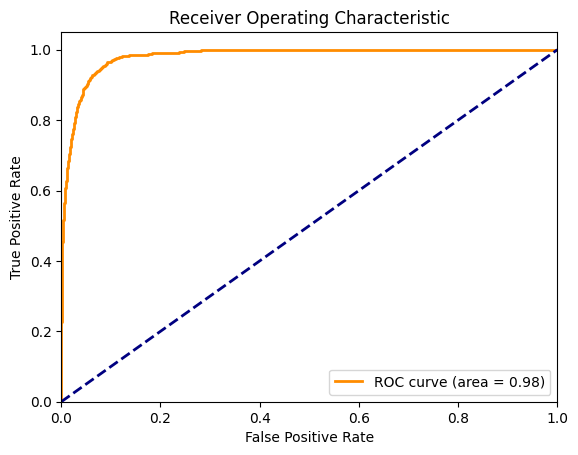

In [100]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()